**Up-and-Out Barrier Call Option Pricing**

This notebook computes the price of an up-and-out European call option using a closed-form formula derived from the Black-Scholes framework.
Barrier adjustments are applied using reflection principles, demonstrating how exotic features modify standard derivative pricing. 

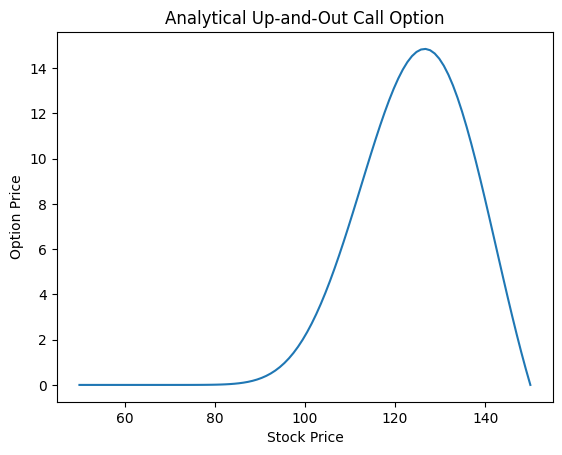

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# --------------------------
# Up-and-Out Call Option (Analytical)
# --------------------------
# Compute up-and-out European call option prices analytically
# using Black-Scholes formula with barrier adjustments.

def up_and_out_call_price(S, K, r, sigma, T, B):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    c1 = (np.log(S/B) + (r + 0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    c2 = c1 - sigma*np.sqrt(T)
    b1 = (np.log(B**2/(K*S)) + (r + 0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    b2 = b1 - sigma*np.sqrt(T)
    a1 = (np.log(B/S) + (r + 0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    a2 = a1 - sigma*np.sqrt(T)
    
    call_price = S*(norm.cdf(d1)-norm.cdf(c1)) - K*np.exp(-r*T)*(norm.cdf(d2)-norm.cdf(c2))
    
    lambda_factor = -2*r/sigma**2
    factor = (S/B)**lambda_factor
    call_price_adj = (call_price
                      - B*factor*(norm.cdf(b1)-norm.cdf(a1))
                      + K*np.exp(-r*T)*factor*S/B*(norm.cdf(b2)-norm.cdf(a2)))
    return call_price_adj

# Example
S = np.linspace(50, 150, 100)
K = 110
r = 0.05
sigma = 0.1
T = 1
B = 150

prices = up_and_out_call_price(S, K, r, sigma, T, B)

plt.plot(S, prices)
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('Analytical Up-and-Out Call Option')
plt.show()
